<a href="https://colab.research.google.com/github/thallescotta/IntroducaoAnalisePreditivaEmSaudecomMachineLearning/blob/main/Avaliacao_AV1_ML_Predicao_em_Saude_Grupo_1_Thalles%2C_Mariana%2C_Luciana_e_Rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabalho de predição em saúde com Machine Learning:**

# Número do grupo: 1
# Nome dos componentes do grupo: Thalles, Mariana, Luciana e Rodrigo

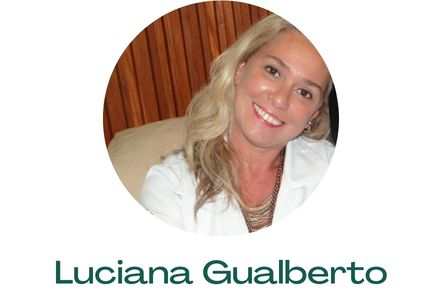Luciana é Bacharel e licenciatura em Enfermagem pela Universidade Gama Filho (1996), habilitação em médico cirúrgico, especialização em Gestão e mestranda em Telessaúde pela Universidade Estadual do Rio de Janeiro (UERJ), Experiência em Gestão e na área de Qualidade e Segurança com formação em avaliação Nacional e Internacional de Acreditação Hospitalar.

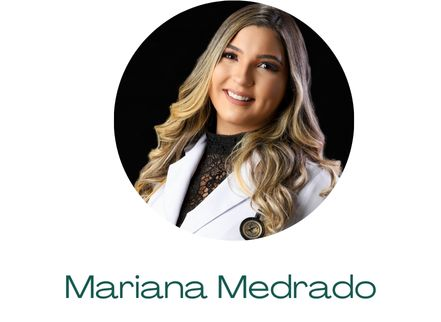Mariana Medrado Gondim é médica e entusiasta da transformação digital da saúde. Possui MBA em Gestão e inovação em Saúde.  Atualmente atua na área de Design Thinking em Produtos de Saúde Digital, utilizando IA e Machine learning na análise de dados, BIs e na criação de algoritmos em saúde. Também trabalha como idealizadora e coordenadora do serviço de Telemedicina em uma Health Tech, sendo a interface entre a área de Tecnologia de Informação e a área médica/enfermagem.

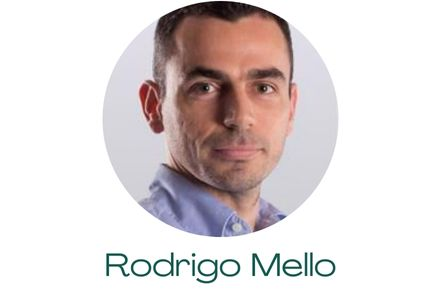Rodrigo Mello possui graduação em Medicina pela Universidade Federal Fluminense (2011). Residência em cirurgia geral pelo Hospital Federal de Ipanema. Atua na área de cirurgia bariátrica e metabólica. Professor e autor do curso preparatório para residência médica: MEDGRUPO Sócio e membro do conselho do Centro Médico Pastore.

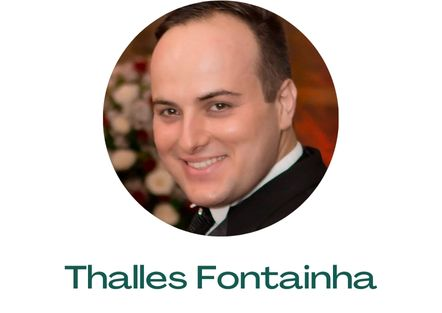 Thalles Fontainha é profissional de Ciência da Computação com experiência em atendimento ao cliente na área de TI e trabalha na StarOne/CLARO Brasil. Em seu projeto final em 2022, integrou o Whatsapp e SUS usando Inteligência Artificial. Contribui para elevar padrões de serviço em TI, valorizando a diversidade. Além disso, aprofunda seus conhecimentos em Business Intelligence com base em sua formação na UERJ e cursos e certificações online.

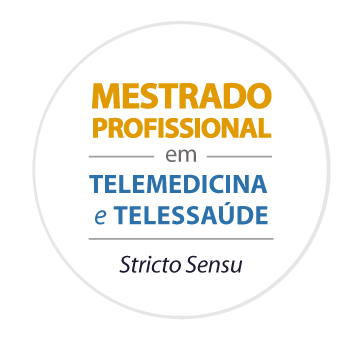

---

O objetivo é obter um modelo de Machine Learning para realizar uma terefa de classificação **OU** uma de regressão, sobre o conjunto de dados births.csv, disponível para download no AVA.

Caso a escolha seja construir um modelo de **classificação** o objetivo será predizer se a criança tem baixo peso ou não, ou seja, a variável (atributo) alvo será **lowbirthweight**:


Caso a escolha seja construir um modelo de **regressão** o objetivo será predizer o peso da criança ao nascer, ou não, ou seja, a variável (atributo) alvo será **weight**:

Instruções:

1) use este notebook para realizar o trabalho;

2) suba para o ambiente de programação do Google Colab o arquivo births.csv, disponível no AVA.

3) realize, no mínimo, as etapas presentes neste notebook

4) Crie celulas de texto para comentar todo o raciocínio, as decisões tomadas e discutir os resultados obtidos.

**IMPORTANTE: É OBRIGATÓRIO OS COMENTÁRIOS CITADO NO ITEM (4) DAS INSTRUÇÕES.**

--------------------------------------------------------

**Dicionário do conjunto de dados births14.csv:**

**Descrição**
Todos os anos, os EUA divulgam ao público um grande conjunto de dados contendo informações
sobre os nascimentos registrados no país. Este conjunto de dados tem sido do interesse de
pesquisadores médicos que estudam a relação entre hábitos e práticas de mulheres grávidas e o
nascimento de seus filhos. Esta é uma amostra aleatória de 1.000 casos do conjunto de dados
divulgado em 2014.

**Variáveis**:

fage - idade do pai em anos

mage - idade da mãe em anos

mature - maturidade da mãe (younger mom, mature mom)

weeks - duração da gestação em semanas

premie - se o nascimento foi classificado como prematuro (premie) ou a termo (full-term)

visits - número de visitas durante a gestação

gained - peso ganho pela mãe durante a gestação em libras

weight - peso da criança ao nascimento em libras

lowbirthweight - se a criança foi classificada como baixo peso (low) ou não (not low)

sex - sexo da criança, female ou male

habit - Status da mãe como não fumante (nonsmoker) ou fumante (smoker)

marital - se a mãe estava casada ou não no nascimento da criança

whitemom - se a mãe é branca ou não

**Fonte**
United States Department of Health and Human Services. Centers for Disease Control and
Prevention. National Center for Health Statistics. Natality Detail File, 2014 United States. Inter-
university Consortium for Political and Social Research, 2016-10-07. doi: 10.3886/ICPSR36461.v1.

# **Etapa 0: carregar as bibliotecas necessárias**

#**Etapa 1: CARREGANDO OS DADOS:**

#**Etapa 2: EXPLORANDO/ENTENDENDO OS DADOS**

# **Etapa 3: PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING**

# **Etapa 4: SELECIONANDO E TREINANDO UM MODELO**

#**Etapa 5: AVALIAR O MODELO NO CONJUNTO DE TESTE**